#CP1
## Netflix Movies and TV Show 데이터 분석

In [1]:
# 사용할 라이브러리

import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt

import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff
from plotly.subplots import make_subplots

### 데이터 확인

Columns

* show_id : 작품 id
* type : Movie / TV Show
* title : 제목
* director : 감독
* cast : 출연진
* country : 제작 국가
* date_added : 등록 날짜
* release_year : 개봉 날짜
* rating : 관람 등급
* duration : 상영 시간
* listed_in : 작품 장르
* description : 작품 설명



In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
df = pd.read_csv('/content/drive/MyDrive/netflix_titles.csv')
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


#### 결측치 확인

In [248]:
df.isna().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

- director 컬럼의 결측치가 많음
- 그 외에도 cast, country, date_added, rating, duration 컬럼 결측치 존재

### 데이터 전처리

#### duration 컬럼 결측치

In [249]:
df[df['duration'].isna()]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
5541,s5542,Movie,Louis C.K. 2017,Louis C.K.,Louis C.K.,United States,"April 4, 2017",2017,74 min,NaN,Movies,"Louis C.K. muses on religion, eternal love, gi..."
5794,s5795,Movie,Louis C.K.: Hilarious,Louis C.K.,Louis C.K.,United States,"September 16, 2016",2010,84 min,NaN,Movies,Emmy-winning comedy writer Louis C.K. brings h...
5813,s5814,Movie,Louis C.K.: Live at the Comedy Store,Louis C.K.,Louis C.K.,United States,"August 15, 2016",2015,66 min,NaN,Movies,The comic puts his trademark hilarious/thought...


In [12]:
df['rating'].unique()

array(['PG-13', 'TV-MA', 'PG', 'TV-14', 'TV-PG', 'TV-Y', 'TV-Y7', 'R',
       'TV-G', 'G', 'NC-17', '74 min', '84 min', '66 min', 'NR', nan,
       'TV-Y7-FV', 'UR'], dtype=object)

In [50]:
extraction = ['74 min', '84 min', '66 min']
df[df['rating'].isin(extraction)]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
5541,s5542,Movie,Louis C.K. 2017,Louis C.K.,Louis C.K.,United States,"April 4, 2017",2017,74 min,NaN,Movies,"Louis C.K. muses on religion, eternal love, gi..."
5794,s5795,Movie,Louis C.K.: Hilarious,Louis C.K.,Louis C.K.,United States,"September 16, 2016",2010,84 min,NaN,Movies,Emmy-winning comedy writer Louis C.K. brings h...
5813,s5814,Movie,Louis C.K.: Live at the Comedy Store,Louis C.K.,Louis C.K.,United States,"August 15, 2016",2015,66 min,NaN,Movies,The comic puts his trademark hilarious/thought...


In [250]:
checklist = [5541, 5794, 5813]
df.loc[checklist]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
5541,s5542,Movie,Louis C.K. 2017,Louis C.K.,Louis C.K.,United States,"April 4, 2017",2017,74 min,NaN,Movies,"Louis C.K. muses on religion, eternal love, gi..."
5794,s5795,Movie,Louis C.K.: Hilarious,Louis C.K.,Louis C.K.,United States,"September 16, 2016",2010,84 min,NaN,Movies,Emmy-winning comedy writer Louis C.K. brings h...
5813,s5814,Movie,Louis C.K.: Live at the Comedy Store,Louis C.K.,Louis C.K.,United States,"August 15, 2016",2015,66 min,NaN,Movies,The comic puts his trademark hilarious/thought...


In [3]:
# **********
# 결측치 대체

from numpy import NaN
df.loc[5541,'duration'] = df.loc[5541, 'rating']
df.loc[5794,'duration'] = df.loc[5794, 'rating']
df.loc[5813,'duration'] = df.loc[5813, 'rating']

df.loc[5541,'rating'] = NaN
df.loc[5794,'rating'] = NaN
df.loc[5813,'rating'] = NaN

In [252]:
df.loc[checklist]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
5541,s5542,Movie,Louis C.K. 2017,Louis C.K.,Louis C.K.,United States,"April 4, 2017",2017,NaN,74 min,Movies,"Louis C.K. muses on religion, eternal love, gi..."
5794,s5795,Movie,Louis C.K.: Hilarious,Louis C.K.,Louis C.K.,United States,"September 16, 2016",2010,NaN,84 min,Movies,Emmy-winning comedy writer Louis C.K. brings h...
5813,s5814,Movie,Louis C.K.: Live at the Comedy Store,Louis C.K.,Louis C.K.,United States,"August 15, 2016",2015,NaN,66 min,Movies,The comic puts his trademark hilarious/thought...


In [5]:
df['duration'].isna().sum()

0

#### rating 컬럼 결측치

In [53]:
df[df['rating'].isna()]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
5541,s5542,Movie,Louis C.K. 2017,Louis C.K.,Louis C.K.,United States,"April 4, 2017",2017,NaN,74 min,Movies,"Louis C.K. muses on religion, eternal love, gi..."
5794,s5795,Movie,Louis C.K.: Hilarious,Louis C.K.,Louis C.K.,United States,"September 16, 2016",2010,NaN,84 min,Movies,Emmy-winning comedy writer Louis C.K. brings h...
5813,s5814,Movie,Louis C.K.: Live at the Comedy Store,Louis C.K.,Louis C.K.,United States,"August 15, 2016",2015,NaN,66 min,Movies,The comic puts his trademark hilarious/thought...
5989,s5990,Movie,13TH: A Conversation with Oprah Winfrey & Ava ...,NaN,"Oprah Winfrey, Ava DuVernay",NaN,"January 26, 2017",2017,NaN,37 min,Movies,Oprah Winfrey sits down with director Ava DuVe...
6827,s6828,TV Show,Gargantia on the Verdurous Planet,NaN,"Kaito Ishikawa, Hisako Kanemoto, Ai Kayano, Ka...",Japan,"December 1, 2016",2013,NaN,1 Season,"Anime Series, International TV Shows","After falling through a wormhole, a space-dwel..."
7312,s7313,TV Show,Little Lunch,NaN,"Flynn Curry, Olivia Deeble, Madison Lu, Oisín ...",Australia,"February 1, 2018",2015,NaN,1 Season,"Kids' TV, TV Comedies","Adopting a child's perspective, this show take..."
7537,s7538,Movie,My Honor Was Loyalty,Alessandro Pepe,"Leone Frisa, Paolo Vaccarino, Francesco Miglio...",Italy,"March 1, 2017",2015,NaN,115 min,Dramas,"Amid the chaos and horror of World War II, a c..."


In [32]:
df['rating'].unique()

array(['PG-13', 'TV-MA', 'PG', 'TV-14', 'TV-PG', 'TV-Y', 'TV-Y7', 'R',
       'TV-G', 'G', 'NC-17', nan, 'NR', 'TV-Y7-FV', 'UR'], dtype=object)

In [4]:
# **********
# 결측치 대체

rating_replace = {
    5541 : 'TV-MA',
    5794 : 'NR',
    5813 : 'NR',
    5989 : 'TV-14',
    6827 : 'TV-14',
    7312 : 'PG',
    7537 : 'PG-13'
}

for key, rating in rating_replace.items():
  df.loc[key, 'rating'] = rating

df.loc[rating_replace.keys()]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
5541,s5542,Movie,Louis C.K. 2017,Louis C.K.,Louis C.K.,United States,"April 4, 2017",2017,TV-MA,74 min,Movies,"Louis C.K. muses on religion, eternal love, gi..."
5794,s5795,Movie,Louis C.K.: Hilarious,Louis C.K.,Louis C.K.,United States,"September 16, 2016",2010,NR,84 min,Movies,Emmy-winning comedy writer Louis C.K. brings h...
5813,s5814,Movie,Louis C.K.: Live at the Comedy Store,Louis C.K.,Louis C.K.,United States,"August 15, 2016",2015,NR,66 min,Movies,The comic puts his trademark hilarious/thought...
5989,s5990,Movie,13TH: A Conversation with Oprah Winfrey & Ava ...,NaN,"Oprah Winfrey, Ava DuVernay",NaN,"January 26, 2017",2017,TV-14,37 min,Movies,Oprah Winfrey sits down with director Ava DuVe...
6827,s6828,TV Show,Gargantia on the Verdurous Planet,NaN,"Kaito Ishikawa, Hisako Kanemoto, Ai Kayano, Ka...",Japan,"December 1, 2016",2013,TV-14,1 Season,"Anime Series, International TV Shows","After falling through a wormhole, a space-dwel..."
7312,s7313,TV Show,Little Lunch,NaN,"Flynn Curry, Olivia Deeble, Madison Lu, Oisín ...",Australia,"February 1, 2018",2015,PG,1 Season,"Kids' TV, TV Comedies","Adopting a child's perspective, this show take..."
7537,s7538,Movie,My Honor Was Loyalty,Alessandro Pepe,"Leone Frisa, Paolo Vaccarino, Francesco Miglio...",Italy,"March 1, 2017",2015,PG-13,115 min,Dramas,"Amid the chaos and horror of World War II, a c..."


In [55]:
df['rating'].isna().sum()

0

#### date_added 컬럼 결측치

In [254]:
df[df['date_added'].isna()]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
6066,s6067,TV Show,A Young Doctor's Notebook and Other Stories,NaN,"Daniel Radcliffe, Jon Hamm, Adam Godley, Chris...",United Kingdom,NaN,2013,TV-MA,2 Seasons,"British TV Shows, TV Comedies, TV Dramas","Set during the Russian Revolution, this comic ..."
6174,s6175,TV Show,Anthony Bourdain: Parts Unknown,NaN,Anthony Bourdain,United States,NaN,2018,TV-PG,5 Seasons,Docuseries,This CNN original series has chef Anthony Bour...
6795,s6796,TV Show,Frasier,NaN,"Kelsey Grammer, Jane Leeves, David Hyde Pierce...",United States,NaN,2003,TV-PG,11 Seasons,"Classic & Cult TV, TV Comedies",Frasier Crane is a snooty but lovable Seattle ...
6806,s6807,TV Show,Friends,NaN,"Jennifer Aniston, Courteney Cox, Lisa Kudrow, ...",United States,NaN,2003,TV-14,10 Seasons,"Classic & Cult TV, TV Comedies",This hit sitcom follows the merry misadventure...
6901,s6902,TV Show,Gunslinger Girl,NaN,"Yuuka Nanri, Kanako Mitsuhashi, Eri Sendai, Am...",Japan,NaN,2008,TV-14,2 Seasons,"Anime Series, Crime TV Shows","On the surface, the Social Welfare Agency appe..."
7196,s7197,TV Show,Kikoriki,NaN,Igor Dmitriev,NaN,NaN,2010,TV-Y,2 Seasons,Kids' TV,A wacky rabbit and his gang of animal pals hav...
7254,s7255,TV Show,La Familia P. Luche,NaN,"Eugenio Derbez, Consuelo Duval, Luis Manuel Áv...",United States,NaN,2012,TV-14,3 Seasons,"International TV Shows, Spanish-Language TV Sh...","This irreverent sitcom featues Ludovico, Feder..."
7406,s7407,TV Show,Maron,NaN,"Marc Maron, Judd Hirsch, Josh Brener, Nora Zeh...",United States,NaN,2016,TV-MA,4 Seasons,TV Comedies,"Marc Maron stars as Marc Maron, who interviews..."
7847,s7848,TV Show,Red vs. Blue,NaN,"Burnie Burns, Jason Saldaña, Gustavo Sorola, G...",United States,NaN,2015,NR,13 Seasons,"TV Action & Adventure, TV Comedies, TV Sci-Fi ...","This parody of first-person shooter games, mil..."
8182,s8183,TV Show,The Adventures of Figaro Pho,NaN,"Luke Jurevicius, Craig Behenna, Charlotte Haml...",Australia,NaN,2015,TV-Y7,2 Seasons,"Kids' TV, TV Comedies","Imagine your worst fears, then multiply them: ..."


In [5]:
# **********
# 결측치 제거

df = df[df['date_added'].notna()]

In [256]:
df['date_added'].isna().sum()

0

#### country 컬럼 결측치

(보류)

In [89]:
df['country'].mode()[0]

'United States'

In [257]:
df[df['country'].isna()]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
5,s6,TV Show,Midnight Mass,Mike Flanagan,"Kate Siegel, Zach Gilford, Hamish Linklater, H...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries",The arrival of a charismatic young priest brin...
6,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",NaN,"September 24, 2021",2021,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...
10,s11,TV Show,"Vendetta: Truth, Lies and The Mafia",NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, Docuseries, International TV S...","Sicily boasts a bold ""Anti-Mafia"" coalition. B..."
...,...,...,...,...,...,...,...,...,...,...,...,...
8718,s8719,Movie,Westside vs. the World,Michael Fahey,"Ron Perlman, Louie Simmons",NaN,"August 9, 2019",2019,TV-MA,96 min,"Documentaries, Sports Movies",A look into the journey of influential strengt...
8759,s8760,Movie,World's Weirdest Homes,Storm Theunissen,Charlie Luxton,NaN,"February 1, 2019",2015,TV-PG,49 min,Movies,From a bubble-shaped palace to an island built...
8783,s8784,TV Show,Yoko,NaN,"Eileen Stevens, Alyson Leigh Rosenfeld, Sarah ...",NaN,"June 23, 2018",2016,TV-Y,1 Season,Kids' TV,"Friends Mai, Oto and Vik's games at the park b..."
8785,s8786,TV Show,YOM,NaN,"Sairaj, Devyani Dagaonkar, Ketan Singh, Mayur ...",NaN,"June 7, 2018",2016,TV-Y7,1 Season,Kids' TV,"With the mind of a human being, and the body o..."


In [6]:
nan_country_df = df[df['country'].isna()]
nan_country_df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
5,s6,TV Show,Midnight Mass,Mike Flanagan,"Kate Siegel, Zach Gilford, Hamish Linklater, H...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries",The arrival of a charismatic young priest brin...
6,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",NaN,"September 24, 2021",2021,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...
10,s11,TV Show,"Vendetta: Truth, Lies and The Mafia",NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, Docuseries, International TV S...","Sicily boasts a bold ""Anti-Mafia"" coalition. B..."


In [7]:
# country 결측치 따로 관리, 메인 데이터프레임에서는 삭제

df = df[df['country'].notna()]

#### director, cast 컬럼 삭제

In [8]:
df = df.drop(['director','cast'], axis=1)

In [9]:
df.isna().sum()

show_id         0
type            0
title           0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

- 결측치 모두 제거

#### rating 등급에 따른 시청 타켓층 컬럼 추가


---

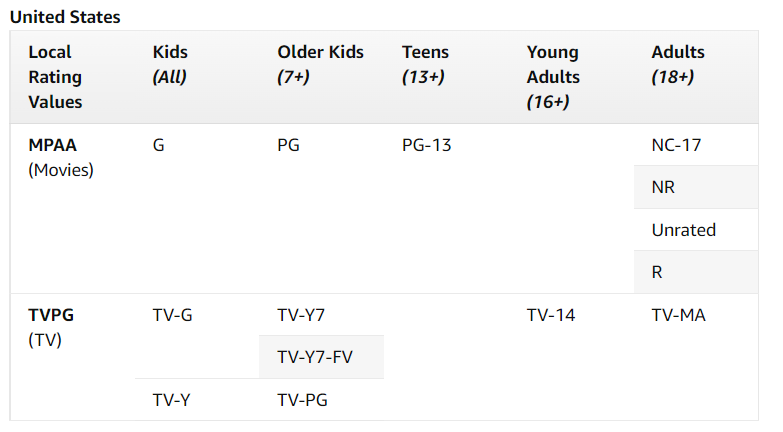

In [92]:
df['rating'].unique()

array(['PG-13', 'TV-MA', 'PG', 'TV-14', 'TV-PG', 'TV-Y', 'TV-Y7', 'R',
       'TV-G', 'G', 'NC-17', 'NR', 'TV-Y7-FV', 'UR'], dtype=object)

In [10]:
# **********
# target_ages 컬럼 추가

ratings_ages = {
    'PG-13': 'Teens(13+)',
    'TV-MA': 'Adults(18+)',
    'PG': 'Older Kids(7+)',
    'TV-14': 'Young Adults(16+)',
    'TV-PG': 'Older Kids(7+)',
    'TV-Y': 'Kids',
    'TV-Y7': 'Older Kids(7+)',
    'R': 'Adults(18+)',
    'TV-G': 'Kids',
    'G': 'Kids',
    'NC-17': 'Adults(18+)',
    'NR': 'Adults(18+)',
    'TV-Y7-FV': 'Older Kids(7+)',
    'UR': 'Adults(18+)'
}

df['target_ages'] = df['rating'].replace(ratings_ages)

In [265]:
df.head()

,show_id,type,title,country,date_added,release_year,rating,duration,listed_in,description,target_ages
0,s1,Movie,Dick Johnson Is Dead,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",Teens(13+)
1,s2,TV Show,Blood & Water,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",Adults(18+)
4,s5,TV Show,Kota Factory,India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,Adults(18+)
7,s8,Movie,Sankofa,"United States, Ghana, Burkina Faso, United Kin...","September 24, 2021",1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s...",Adults(18+)
8,s9,TV Show,The Great British Baking Show,United Kingdom,"September 24, 2021",2021,TV-14,9 Seasons,"British TV Shows, Reality TV",A talented batch of amateur bakers face off in...,Young Adults(16+)


#### country 컬럼의 값이 여러개인 경우, 제일 앞에 위치하는 대표 국가만 추출

In [11]:
df['principal_country'] = df['country'].apply(lambda x: x.split(",")[0])
df.head()

,show_id,type,title,country,date_added,release_year,rating,duration,listed_in,description,target_ages,principal_country
0,s1,Movie,Dick Johnson Is Dead,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",Teens(13+),United States
1,s2,TV Show,Blood & Water,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",Adults(18+),South Africa
4,s5,TV Show,Kota Factory,India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,Adults(18+),India
7,s8,Movie,Sankofa,"United States, Ghana, Burkina Faso, United Kin...","September 24, 2021",1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s...",Adults(18+),United States
8,s9,TV Show,The Great British Baking Show,United Kingdom,"September 24, 2021",2021,TV-14,9 Seasons,"British TV Shows, Reality TV",A talented batch of amateur bakers face off in...,Young Adults(16+),United Kingdom


In [267]:
df['country'].nunique(), df['principal_country'].nunique()

(748, 86)

In [268]:
df.head()

,show_id,type,title,country,date_added,release_year,rating,duration,listed_in,description,target_ages,principal_country
0,s1,Movie,Dick Johnson Is Dead,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",Teens(13+),United States
1,s2,TV Show,Blood & Water,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",Adults(18+),South Africa
4,s5,TV Show,Kota Factory,India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,Adults(18+),India
7,s8,Movie,Sankofa,"United States, Ghana, Burkina Faso, United Kin...","September 24, 2021",1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s...",Adults(18+),United States
8,s9,TV Show,The Great British Baking Show,United Kingdom,"September 24, 2021",2021,TV-14,9 Seasons,"British TV Shows, Reality TV",A talented batch of amateur bakers face off in...,Young Adults(16+),United Kingdom


#### date_added 컬럼을 통해서 year 정보만 따로 컬럼 추가

In [12]:
df['year_added'] = df['date_added'].apply(lambda x: x.split(" ")[-1])
df['year_added'] = pd.to_numeric(df['year_added'])
df.head()

,show_id,type,title,country,date_added,release_year,rating,duration,listed_in,description,target_ages,principal_country,year_added
0,s1,Movie,Dick Johnson Is Dead,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",Teens(13+),United States,2021
1,s2,TV Show,Blood & Water,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",Adults(18+),South Africa,2021
4,s5,TV Show,Kota Factory,India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,Adults(18+),India,2021
7,s8,Movie,Sankofa,"United States, Ghana, Burkina Faso, United Kin...","September 24, 2021",1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s...",Adults(18+),United States,2021
8,s9,TV Show,The Great British Baking Show,United Kingdom,"September 24, 2021",2021,TV-14,9 Seasons,"British TV Shows, Reality TV",A talented batch of amateur bakers face off in...,Young Adults(16+),United Kingdom,2021


### 데이터 시각화

#### Movie와 TV Show 분포 시각화

In [270]:
type_df = df['type'].value_counts().reset_index()
type_df

,index,type
0,Movie,5691
1,TV Show,2276


In [271]:
fig = px.pie(type_df, names='index', values='type')
fig.update_traces(textposition='inside', textinfo='percent+label')  # 라벨링
fig.show()

#### rating 별 작품 개수 시각화

In [272]:
rating_df = df.groupby(['target_ages', 'rating'])['show_id'].count().reset_index()
rating_df.columns =['target_ages', 'rating', 'counts']
rating_df = rating_df.sort_values('target_ages')
rating_df

,target_ages,rating,counts
0,Adults(18+),NC-17,3
1,Adults(18+),NR,81
2,Adults(18+),R,788
3,Adults(18+),TV-MA,2930
4,Adults(18+),UR,3
5,Kids,G,41
6,Kids,TV-G,190
7,Kids,TV-Y,227
8,Older Kids(7+),PG,282
9,Older Kids(7+),TV-PG,771


In [273]:
fig = px.bar(rating_df, x='rating', y='counts', color='target_ages')
fig.show()

#### target_ages 별 작품 개수 시각화

In [274]:
target_df = df.groupby(['target_ages'])['show_id'].count().reset_index()
target_df.columns =['target_ages', 'counts']
target_df

,target_ages,counts
0,Adults(18+),3805
1,Kids,458
2,Older Kids(7+),1293
3,Teens(13+),483
4,Young Adults(16+),1928


In [275]:
fig = px.bar(target_df, x='target_ages', y='counts', color='target_ages')
fig.show()

#### type 별 target_ages 작품 개수 시각화

In [13]:
movie_df = df[df['type'] == 'Movie']
tv_df = df[df['type'] == 'TV Show']

In [15]:
movie_group = movie_df.groupby(['target_ages'])['show_id'].count().reset_index()
tv_group = tv_df.groupby('target_ages')['show_id'].count().reset_index()

In [278]:
movie_group

,target_ages,show_id
0,Adults(18+),2795
1,Kids,234
2,Older Kids(7+),872
3,Teens(13+),483
4,Young Adults(16+),1307


In [280]:
fig = make_subplots(rows=1, cols=2, specs=[[{"type": "pie"}, {"type": "pie"}]])

fig.add_trace(
    go.Pie(labels=movie_group['target_ages'], values=movie_group['show_id']),
    row=1, col=1
)

fig.add_trace(
    go.Pie(labels=tv_group['target_ages'], values=tv_group['show_id']),
    row=1, col=2
)

fig.update_traces(textposition='inside', hole=.4, hoverinfo="label+percent+name")
fig.update_layout(
    title_text="Rating distribution by Type of content",
    # Add annotations in the center of the donut pies.
    annotations=[dict(text='Movies', x=0.21, y=0.5, font_size=12, showarrow=False),
                 dict(text='TV Shows', x=0.8, y=0.5, font_size=12, showarrow=False)])
fig.show()

- 어른을 위한 컨텐츠가 많음
- 티비 컨텐츠에는 Teen 관람 컨텐츠가 없음

#### country 분포 시각화

In [281]:
country_df = df['principal_country'].value_counts().reset_index()
country_df = country_df[country_df['principal_country'] /  country_df['principal_country'].sum() > 0.01]

fig = px.pie(country_df, values='principal_country', names='index')
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.show()

#### 컨텐츠 등록 연도 분포 시각화

In [282]:
df['year_added'].unique()

array([2021, 2020, 2019, 2018, 2017, 2016, 2015, 2014, 2013, 2012, 2011,
       2009, 2008, 2010])

- 2008년부터 2021년까지의 컨텐츠 보유

In [283]:
added_year_df = df.groupby(['year_added', 'type']).agg({'show_id': 'count'}).reset_index()

fig = go.Figure()

fig.add_trace(go.Scatter( 
    x=added_year_df.loc[added_year_df['type'] == 'Movie']['year_added'], 
    y=added_year_df.loc[added_year_df['type'] == 'Movie']['show_id'],
    mode='lines+markers',
    name='Movie: Year Added',
    marker_color='orange',
))
fig.add_trace(go.Scatter( 
    x=added_year_df.loc[added_year_df['type'] == 'TV Show']['year_added'], 
    y=added_year_df.loc[added_year_df['type'] == 'TV Show']['show_id'],
    mode='lines+markers',
    name='TV Show: Year Added',
    marker_color='green',
))
fig.update_xaxes(categoryorder='total descending')
fig.show()

- 영화, 티비쇼 모두 2019년까지 증가
- 영화 컨텐츠는 2020년 감소한 반면, 티비 컨텐츠는 2020년 증가   
- 2021년은 둘 다 감소   
 -> 코로나19 영향 예상
- 2016 ~ 2018년, 영화 컨텐츠가 급격히 많아짐   
 -> 2013년 넷플릭스 자체 제작 컨텐츠인 <넷플릭스 오리지널>이 처음 제공되었고   
  2016년부터 전세계 190여 개국에 넷플릭스 서비스를 제공하였다.   
  사용 유저가 증가함에 따라 컨텐츠 등록 수가 증가함

#### listed_in 컬럼을 통한 컨텐츠 장르 분석 시각화

In [14]:
movie_df['genre'] = movie_df['listed_in'].apply(lambda x :  x.replace(' ,',',').replace(', ',',').split(',')) 
tv_df['genre'] = tv_df['listed_in'].apply(lambda x :  x.replace(' ,',',').replace(', ',',').split(',')) 

display(movie_df['genre'].head())
display(tv_df['genre'].head())

0                                       [Documentaries]
7     [Dramas, Independent Movies, International Mov...
9                                    [Comedies, Dramas]
12                       [Dramas, International Movies]
24    [Comedies, International Movies, Romantic Movies]
Name: genre, dtype: object

1     [International TV Shows, TV Dramas, TV Mysteries]
4     [International TV Shows, Romantic TV Shows, TV...
8                        [British TV Shows, Reality TV]
15                             [TV Comedies, TV Dramas]
17    [Crime TV Shows, Spanish-Language TV Shows, TV...
Name: genre, dtype: object

In [15]:
# 다중 라벨 이진화 라이브러러
from sklearn.preprocessing import MultiLabelBinarizer 

# 다중 라벨 이진화 데이터프레임 생성
def calculate_mlb(series):
    mlb = MultiLabelBinarizer()
    mlb_df = pd.DataFrame(mlb.fit_transform(series), columns=mlb.classes_, index=series.index)
    return mlb_df

In [23]:
movie_genres_df = calculate_mlb(movie_df['genre'])
top_movie_genres = movie_genres_df.sum().sort_values(ascending=False).head(10)
top_movie_genres

International Movies        2543
Dramas                      2317
Comedies                    1580
Action & Adventure           817
Documentaries                794
Independent Movies           745
Romantic Movies              588
Thrillers                    549
Children & Family Movies     535
Horror Movies                340
dtype: int64

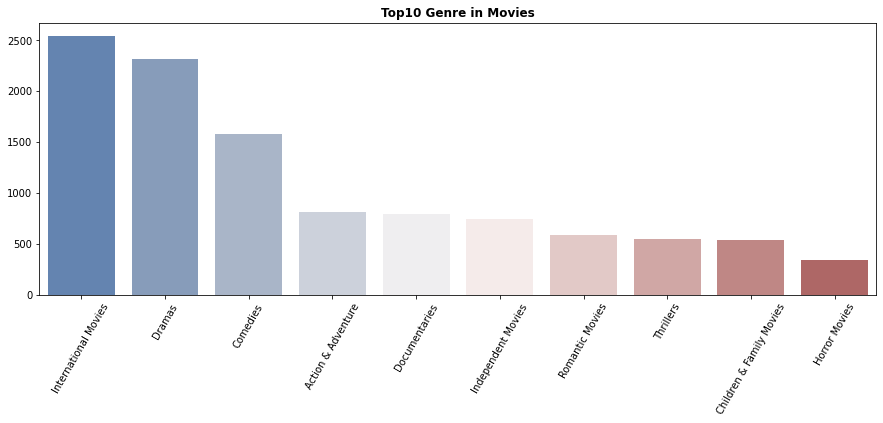

In [293]:
plt.figure(figsize=(15,5)) 
sns.barplot(x=top_movie_genres.index, y=top_movie_genres.values, palette="vlag") 
plt.xticks(rotation=60) 
plt.title("Top10 Genre in Movies",fontweight="bold") 
plt.show()


In [287]:
tv_genres_df = calculate_mlb(tv_df['genre'])
top_tv_genres = tv_genres_df.sum().sort_values(ascending=False).head(10)
top_tv_genres

International TV Shows    1127
TV Dramas                  662
TV Comedies                494
Crime TV Shows             420
Kids' TV                   369
Docuseries                 329
Romantic TV Shows          299
British TV Shows           236
Reality TV                 205
Anime Series               153
dtype: int64

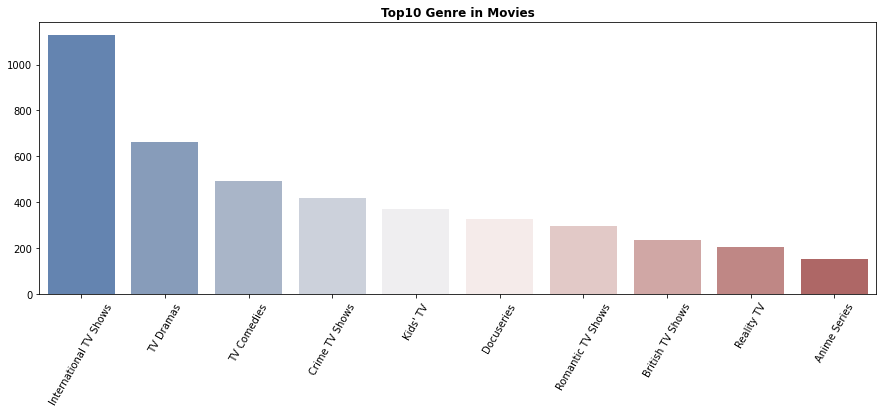

In [288]:
plt.figure(figsize=(15,5)) 
sns.barplot(x=top_tv_genres.index, y=top_tv_genres.values, palette="vlag") 
plt.xticks(rotation=60) 
plt.title("Top10 Genre in Movies",fontweight="bold") 
plt.show()

top_movie_genres = {   
> 1 : 'International Movies',   
  2 : 'Dramas',   
  3 : 'Comedies',   
  4 : 'Documentaries',   
  5 : 'Action & Adventure'   

}

top_tv_genres = {   
> 1 : 'International TV Shows',   
  2 : 'TV Dramas',   
  3 : 'TV Comedies',   
  4 : 'Crime TV Shows',   
  5 : 'Kids' TV'   
    
}

#### duration 분석 시각화

In [294]:
tv_df['duration'].unique()

array(['2 Seasons', '9 Seasons', '4 Seasons', '5 Seasons', '3 Seasons',
       '1 Season', '6 Seasons', '7 Seasons', '10 Seasons', '8 Seasons',
       '17 Seasons', '13 Seasons', '15 Seasons', '12 Seasons',
       '11 Seasons'], dtype=object)

In [295]:
fig = px.histogram(x=tv_df['duration'])
fig.update_xaxes(categoryorder="total descending")
fig.update_layout(
    title="Distribution of TV shows duration",
    xaxis_title="Duration of the TV Show",
)
fig.show()

- 시즌1 컨텐츠가 가장 많다

In [136]:
movie_df['duration'].unique()

array(['90 min', '91 min', '125 min', '104 min', '127 min', '67 min',
       '94 min', '161 min', '61 min', '166 min', '147 min', '103 min',
       '97 min', '106 min', '111 min', '110 min', '105 min', '96 min',
       '124 min', '116 min', '98 min', '23 min', '115 min', '122 min',
       '99 min', '88 min', '100 min', '102 min', '93 min', '95 min',
       '85 min', '83 min', '113 min', '13 min', '182 min', '48 min',
       '145 min', '87 min', '92 min', '80 min', '117 min', '128 min',
       '119 min', '143 min', '114 min', '118 min', '108 min', '63 min',
       '121 min', '142 min', '154 min', '120 min', '82 min', '109 min',
       '101 min', '86 min', '229 min', '76 min', '89 min', '156 min',
       '112 min', '107 min', '129 min', '135 min', '136 min', '165 min',
       '150 min', '133 min', '70 min', '84 min', '140 min', '78 min',
       '64 min', '59 min', '139 min', '69 min', '148 min', '189 min',
       '141 min', '130 min', '138 min', '81 min', '132 min', '123 min',
       '65

In [298]:
temp_duration = movie_df['duration'].apply(lambda x: int(x.split(' ')[0]))

movie_df.loc[temp_duration.loc[temp_duration < 60].index, 'duration_bin'] = 'Less than 1 hours'
movie_df.loc[temp_duration.loc[(temp_duration >= 60) & (temp_duration < 90)].index, 'duration_bin'] = 'More than 1 - less than 1.5 hours'
movie_df.loc[temp_duration.loc[(temp_duration >= 90) & (temp_duration < 120)].index, 'duration_bin'] = 'More than 1.5 - less than 2 hours'
movie_df.loc[temp_duration.loc[(temp_duration >= 120) & (temp_duration < 150)].index, 'duration_bin'] = 'More than 2 - less than 2.5 hours'
movie_df.loc[temp_duration.loc[(temp_duration >= 150) & (temp_duration < 180)].index, 'duration_bin'] = 'More than 2.5 - less than 3 hours'
movie_df.loc[temp_duration.loc[temp_duration >= 180].index, 'duration_bin'] = 'More than 3 hours'

In [299]:
fig = px.histogram(x=movie_df['duration_bin'], color=movie_df['duration_bin'])
fig.update_xaxes(categoryorder = "array",
                categoryarray = ['Less than 1 hours', 'More than 1 - less than 1.5 hours', 'More than 1.5 - less than 2 hours', 'More than 2 - less than 2.5 hours', 'More than 2.5 - less than 3 hours', 'More than 3 hours'],
                )
fig.update_layout(
    title="Distribution of movies duration",
    xaxis_title="Duration of the Movies",
)
fig.show()

- 1시간 30분 - 2시간의 런타임을 갖는 영화가 가장 많다.
- 1시간 - 1시간 30분 런타임을 갖는 영화가 두번째로 많다.
- 1시간 미만의 영화는 369개로 의외로 많았다.
- 3시간 이상의 영화는 거의 없다.

#### 넷플릭스 제작 국가 분석

In [304]:
top_country = df['principal_country'].value_counts().sort_values(ascending=False).head(10)
top_country

United States     3205
India             1008
United Kingdom     627
Canada             271
Japan              258
France             212
South Korea        211
Spain              181
Mexico             134
Australia          116
Name: principal_country, dtype: int64

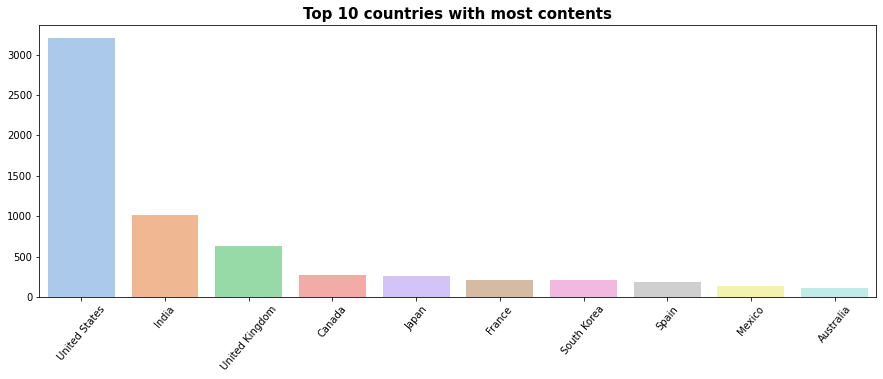

In [305]:
plt.figure(figsize=(15,5)) 
sns.barplot(x= top_country.index, y=top_country.values, palette="pastel") 
plt.xticks(rotation=50) 
plt.title('Top 10 countries with most contents', fontsize=15, fontweight='bold') 
plt.show()

### 컨텐츠 기반 필터링

In [ ]:
# 라이브러리

# 단어들의 카운트(빈도)로 문서들을 벡터화하는 라이브러리
from sklearn.feature_extraction.text import CountVectorizer
# 코사인 유사도 계산 라이브러리
from sklearn.metrics.pairwise import cosine_similarity

#### description 기반 필터링

In [81]:
movie_df.reset_index(inplace=True)

# ngram 범위 (min_n, max_n)
# ngram은 단어장 생성에 사용할 토큰의 크기를 결정
vectorizer = CountVectorizer(ngram_range=(1,3))

desc_vector = vectorizer.fit(movie_df['description'])
# print(desc_vector.vocabulary_)

desc_vector = vectorizer.transform(movie_df['description'])
# print(desc_vector)

In [82]:
# 각 컨텐츠마다 코사인 유사도 계산 후,
# 오름차순으로 정렬된 컨텐츠의 인덱스를 내림차순으로 변경
similarity_desc = cosine_similarity(desc_vector, desc_vector).argsort()[:, ::-1]

In [83]:
def desc_recommend(df, title, top=20):
  # 타겟 컨텐츠의 인덱스 추출
  target_index = df[df['title'] == title].index.values

  # 미리 계산해둔 코사인 유사도에서 가장 유사한 컨텐츠들의 인덱스 추출
  sim_index = similarity_desc[target_index, :top].reshape(-1)

  # 타켓 컨텐츠는 추천 리스트에서 제외
  sim_index = sim_index[sim_index != target_index]

  return df.iloc[sim_index][:5]

In [96]:
desc_recommend(movie_df, 'Bad Boys')[['title', 'country', 'date_added', 'genre', 'release_year', 'duration', 'target_ages', 'description']]

,title,country,date_added,genre,release_year,duration,target_ages,description
3703,Bad Boys II,United States,"October 1, 2019","[Action & Adventure, Comedies]",2003,147 min,Adults(18+),"In this hyperkinetic sequel, a pair of Miami n..."
4262,Hellboy,United States,"December 1, 2018","[Action & Adventure, Cult Movies, Sci-Fi & Fan...",2004,122 min,Teens(13+),This fast-paced action flick tells the dark st...
5646,Winter's Bone,United States,"March 1, 2019","[Dramas, Independent Movies]",2010,100 min,Adults(18+),"In this unflinching noir drama, a resilient te..."
5029,Senna,"United Kingdom, France, United States","October 1, 2019","[Documentaries, International Movies, Sports M...",2010,106 min,Teens(13+),This fast-paced documentary profiles Ayrton Se...
2111,Born in Gaza,Spain,"May 17, 2019","[Documentaries, International Movies]",2014,70 min,Young Adults(16+),This documentary focuses on the devastating vi...


In [84]:
desc_recommend(movie_df, 'Je Suis Karl')['description'].values

array(['After her family is murdered, a mild-mannered mom remakes herself into a badass vigilante in order to exact violent justice.',
       'A young woman who is suspected of practicing black magic and witchcraft is demonized and forced to live apart from her family.',
       "After high school, a young woman marries the man of her father's choice but soon faces the possibility that her religion considers the union invalid.",
       "When his partner is killed, a young cop is forced to care for the man's four children, and solicits the help of a woman who moves in with them.",
       'After a woman is very publicly left at the altar, the PR expert hired to fix the situation winds up falling in love with her.'],
      dtype=object)

In [90]:
movie_df[movie_df['title'] == 'Je Suis Karl']['description'].values

array(['After most of her family is murdered in a terrorist bombing, a young woman is unknowingly lured into joining the very group that killed them.'],
      dtype=object)

#### genre 기반 필터링

In [67]:
import copy

data = copy.deepcopy(movie_df)
data['genre'] = data['genre'].apply(lambda x: " ".join(x))
data['genre']

0                                        Documentaries
1       Dramas Independent Movies International Movies
2                                      Comedies Dramas
3                          Dramas International Movies
4        Comedies International Movies Romantic Movies
                             ...                      
5686             Dramas International Movies Thrillers
5687                      Cult Movies Dramas Thrillers
5688                            Comedies Horror Movies
5689                 Children & Family Movies Comedies
5690      Dramas International Movies Music & Musicals
Name: genre, Length: 5691, dtype: object

In [72]:
genre_vector = vectorizer.fit_transform(data['genre'])
similarity_genre = cosine_similarity(genre_vector, genre_vector).argsort()[:, ::-1]

In [73]:
def genre_recommend(df, title, top=20):
  # 타겟 컨텐츠의 인덱스 추출
  target_index = df[df['title'] == title].index.values

  # 미리 계산해둔 장르 코사인 유사도에서 가장 유사한 컨텐츠들의 인덱스 추출
  sim_index = similarity_genre[target_index, :top].reshape(-1)

  # 타켓 컨텐츠는 추천 리스트에서 제외
  sim_index = sim_index[sim_index != target_index]

  return df.iloc[sim_index][:5]

In [97]:
genre_recommend(data, 'Zombieland')[['title', 'country', 'date_added', 'genre', 'release_year', 'duration', 'target_ages', 'description']]

,title,country,date_added,genre,release_year,duration,target_ages,description
1006,Vampires vs. the Bronx,United States,"October 2, 2020",Comedies Horror Movies,2020,86 min,Teens(13+),Three gutsy kids from a rapidly gentrifying Br...
3045,Little Evil,United States,"September 1, 2017",Comedies Horror Movies,2017,95 min,Adults(18+),"In this horror-comedy, a recently married man ..."
3555,A Haunted House,United States,"February 21, 2020",Comedies Horror Movies,2013,86 min,Adults(18+),This spoof on scary movies follows a young cou...
5005,Scary Movie 5,United States,"August 12, 2020",Comedies Horror Movies,2013,88 min,Teens(13+),Taking aim at not only the horror genre but al...
993,Hubie Halloween,United States,"October 7, 2020",Comedies Horror Movies,2020,104 min,Teens(13+),"Hubie's not the most popular guy in Salem, Mas..."


In [75]:
genre_recommend(data, 'Zombieland')['description'].values

array(['Three gutsy kids from a rapidly gentrifying Bronx neighborhood stumble upon a sinister plot to suck all the life from their beloved community.',
       'In this horror-comedy, a recently married man who wants to bond with his stepson begins to fear that the boy is a demon.',
       'This spoof on scary movies follows a young couple settling into a new home, where an evil spirit — and horrifyingly hilarious antics — await.',
       'Taking aim at not only the horror genre but also films like "Black Swan" and "Inception," "Scary Movie 5" widens the franchise\'s scope of mockery.',
       "Hubie's not the most popular guy in Salem, Mass., but when Halloween turns truly spooky, this good-hearted scaredy-cat sets out to keep his town safe."],
      dtype=object)